In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()  # Manually upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sindhujagandi","key":"f360b4c13c138e226412c0b5d47f638e"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d theblackmamba31/landscape-image-colorization


Dataset URL: https://www.kaggle.com/datasets/theblackmamba31/landscape-image-colorization
License(s): unknown
 99% 190M/192M [00:09<00:00, 24.2MB/s]
100% 192M/192M [00:09<00:00, 20.9MB/s]


In [ ]:
import zipfile

dataset_zip = "landscape-image-colorization.zip"
with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall("landscape_dataset")


In [ ]:
import os

dataset_path = "landscape_dataset/landscape Images"  # Check inside "landscape Images"
print("Files in 'landscape Images':", os.listdir(dataset_path))


Files in 'landscape Images': ['color', 'gray']


In [ ]:
gray_folder = os.path.join(dataset_path, "gray")
color_folder = os.path.join(dataset_path, "color")

if os.path.exists(gray_folder):
    print(f"Gray folder found! Total images: {len(os.listdir(gray_folder))}")
else:
    print(f"Gray folder NOT found at {gray_folder}")

if os.path.exists(color_folder):
    print(f"Color folder found! Total images: {len(os.listdir(color_folder))}")
else:
    print(f"Color folder NOT found at {color_folder}")


Gray folder found! Total images: 7129
Color folder found! Total images: 7129


**To check Image sizes,aspect ratios and Descriptive Statistics**

In [ ]:
import cv2
import pandas as pd
import os

# Dataset paths
folders = [gray_folder, color_folder]
image_shapes = []

# Loop through each folder and read images
for folder in folders:
    if os.path.exists(folder):
        for img_name in os.listdir(folder):
            img_path = os.path.join(folder, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                h, w = img.shape[:2]  # Height, Width
                c = 1 if len(img.shape) == 2 else img.shape[2]  # 1 for grayscale, 3 for color
                image_shapes.append((h, w, c))

# Convert to DataFrame and compute aspect ratio
df_shapes = pd.DataFrame(image_shapes, columns=["Height", "Width", "Channels"])
df_shapes["Aspect Ratio"] = df_shapes["Width"] / df_shapes["Height"]

# Print summary
print(df_shapes.head())
print("\nDescriptive Statistics:")
print(df_shapes.describe())


   Height  Width  Channels  Aspect Ratio
0     150    150         3           1.0
1     150    150         3           1.0
2     150    150         3           1.0
3     150    150         3           1.0
4     150    150         3           1.0

Descriptive Statistics:
             Height    Width  Channels  Aspect Ratio
count  14258.000000  14258.0   14258.0  14258.000000
mean     149.886800    150.0       3.0      1.001206
std        2.414321      0.0       0.0      0.028389
min       72.000000    150.0       3.0      1.000000
25%      150.000000    150.0       3.0      1.000000
50%      150.000000    150.0       3.0      1.000000
75%      150.000000    150.0       3.0      1.000000
max      150.000000    150.0       3.0      2.083333


**Histogram of Image Width and Height and Aspect Ratio Distribution**

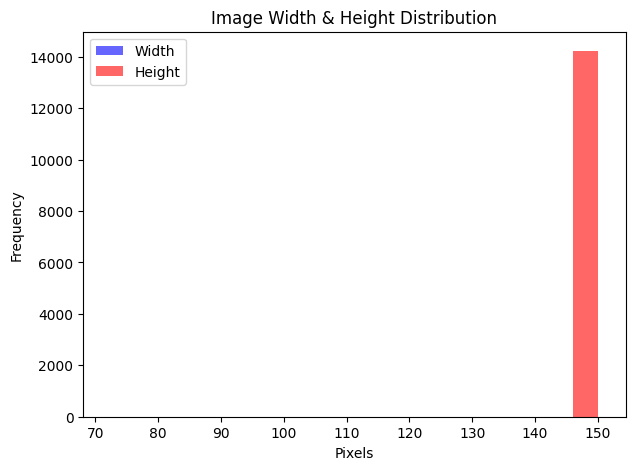

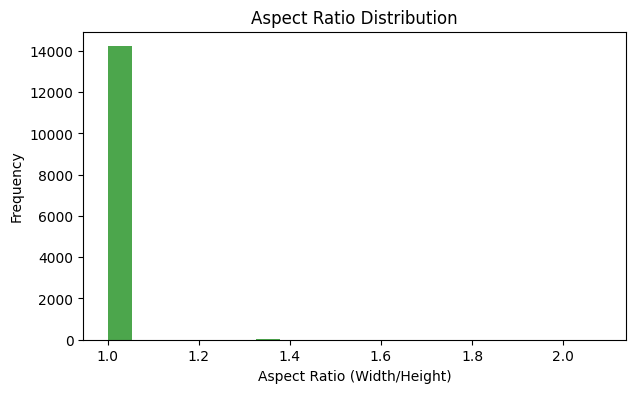

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame
df_shapes = pd.DataFrame(image_shapes, columns=["Height", "Width", "Channels"])
df_shapes["Aspect Ratio"] = df_shapes["Width"] / df_shapes["Height"]

# **1. Histogram of Image Width and Height**
plt.figure(figsize=(7, 5))
plt.hist(df_shapes["Width"], bins=20, alpha=0.6, label="Width", color='blue')
plt.hist(df_shapes["Height"], bins=20, alpha=0.6, label="Height", color='red')
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.title("Image Width & Height Distribution")
plt.legend()
plt.show()

#  **2. Aspect Ratio Distribution**
plt.figure(figsize=(7, 4))
plt.hist(df_shapes["Aspect Ratio"], bins=20, color='green', alpha=0.7)
plt.xlabel("Aspect Ratio (Width/Height)")
plt.ylabel("Frequency")
plt.title("Aspect Ratio Distribution")
plt.show()


**Visualizing the samples **

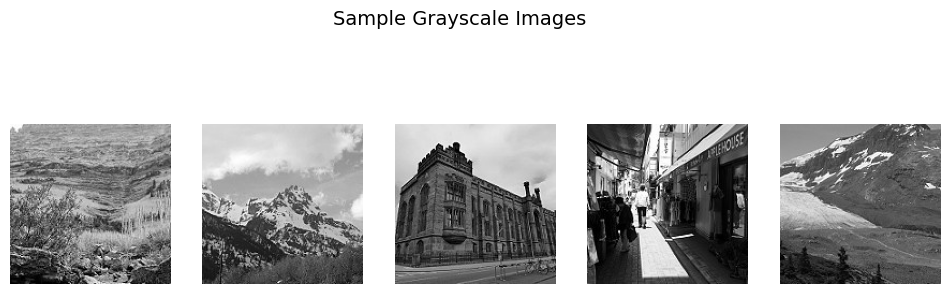

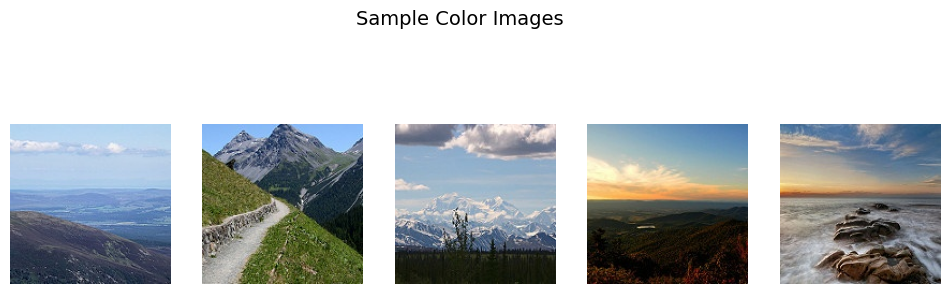

In [ ]:
import random
import matplotlib.pyplot as plt

def show_sample_images(folder, title, num_samples=5):
    if not os.path.exists(folder):
        print(f"Error: Folder {folder} does not exist.")
        return

    # Get all valid image files
    image_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

    if len(image_files) == 0:
        print(f"No images found in {folder}")
        return

    # Limit to available images if fewer than num_samples exist
    num_samples = min(num_samples, len(image_files))

    # Select random images
    sample_images = random.sample(image_files, num_samples)

    plt.figure(figsize=(12, 4))
    for i, img_path in enumerate(sample_images):
        img = cv2.imread(img_path)

        if len(img.shape) == 2:  # Grayscale image
            cmap = "gray"
        else:  # Color image
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            cmap = None

        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img, cmap=cmap)
        plt.axis("off")

    plt.suptitle(title, fontsize=14)
    plt.show()

# Display 5 random images from each folder
show_sample_images(gray_folder, "Sample Grayscale Images")
show_sample_images(color_folder, "Sample Color Images")

RGB Channel Distribution


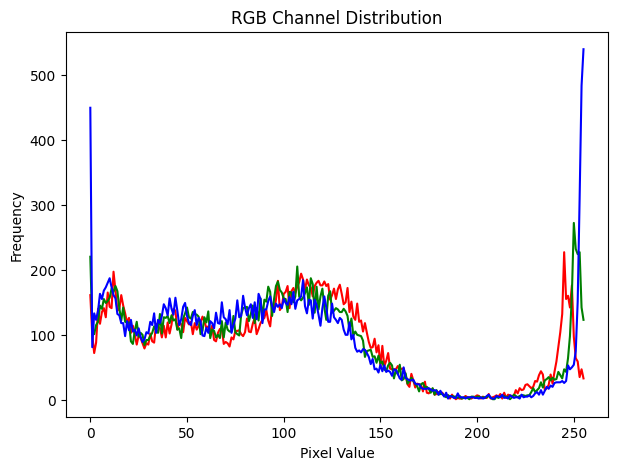

In [ ]:
def plot_rgb_histogram(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    colors = ('r', 'g', 'b')
    plt.figure(figsize=(7, 5))

    for i, color in enumerate(colors):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)

    plt.title("RGB Channel Distribution")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.show()

# Pick a random image from the color folder
if os.path.exists(color_folder):
    color_images = [os.path.join(color_folder, f) for f in os.listdir(color_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]
    if color_images:
        plot_rgb_histogram(random.choice(color_images))

Image Size Distribution

   Height  Width  Channels   Size
0     150    150         3  22500
1     150    150         3  22500
2     150    150         3  22500
3     150    150         3  22500
4     150    150         3  22500


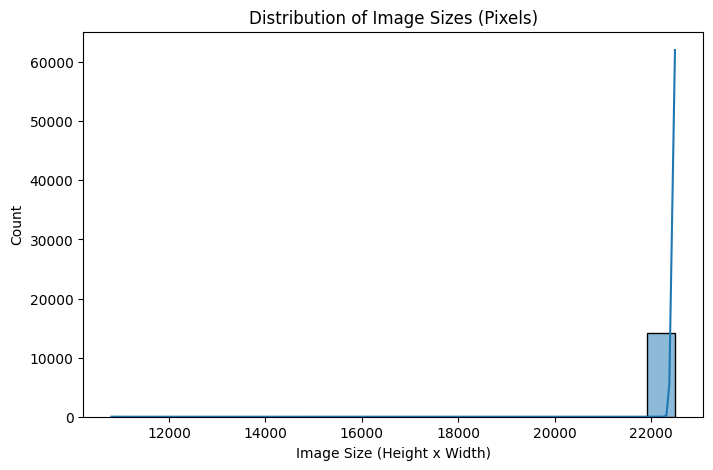

In [ ]:
import os
import cv2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define source image folders
gray_folder = "landscape_dataset/landscape Images/gray"
color_folder = "landscape_dataset/landscape Images/color"

# List to store image shape details
image_shapes = []

# Process both gray and color image folders
for folder in [gray_folder, color_folder]:
    if os.path.exists(folder):
        for img_name in os.listdir(folder):
            img_path = os.path.join(folder, img_name)
            img = cv2.imread(img_path)

            if img is not None:
                h, w, c = img.shape  # Get height, width, channels
                image_shapes.append((h, w, c))
            else:
                print(f"Warning: Could not read {img_path}")  # Debugging message

# Create DataFrame only if images were processed
if len(image_shapes) > 0:
    df_shapes = pd.DataFrame(image_shapes, columns=["Height", "Width", "Channels"])

    # Check if columns exist before using them
    if "Height" in df_shapes.columns and "Width" in df_shapes.columns:
        df_shapes["Size"] = df_shapes["Height"] * df_shapes["Width"]  # Calculate Size

        # Display DataFrame structure
        print(df_shapes.head())

        # Plot the histogram of image sizes
        plt.figure(figsize=(8, 5))
        sns.histplot(df_shapes["Size"], bins=20, kde=True)
        plt.title("Distribution of Image Sizes (Pixels)")
        plt.xlabel("Image Size (Height x Width)")
        plt.ylabel("Count")
        plt.show()
    else:
        print("Error: 'Height' or 'Width' column is missing in df_shapes")
else:
    print("Error: No images found. Please check your dataset path.")




Mean and Standard Deviation of Images

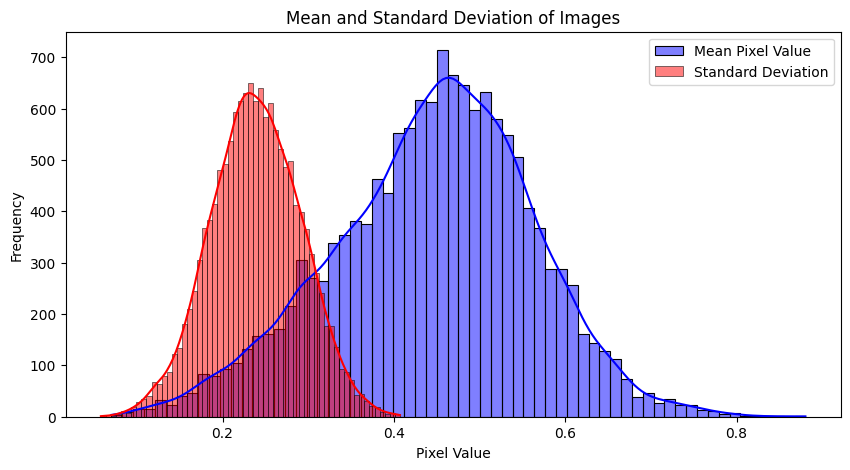

In [ ]:
import numpy as np
import cv2

means, stds = [], []

for folder in [gray_folder, color_folder]:
    if os.path.exists(folder):
        for img_name in os.listdir(folder):
            img_path = os.path.join(folder, img_name)
            img = cv2.imread(img_path) / 255.0  # Normalize
            if img is not None:
                means.append(np.mean(img))
                stds.append(np.std(img))

# Plot distribution
plt.figure(figsize=(10, 5))
sns.histplot(means, kde=True, color='blue', label="Mean Pixel Value")
sns.histplot(stds, kde=True, color='red', label="Standard Deviation")
plt.legend()
plt.title("Mean and Standard Deviation of Images")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


**Image Brightness distribution**

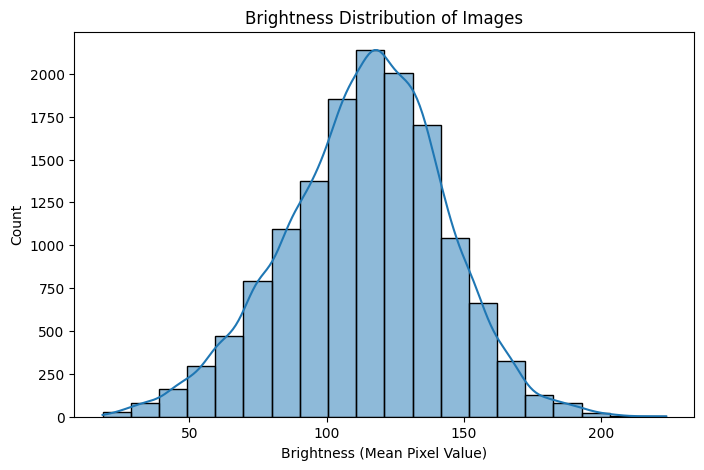

In [ ]:
brightness_values = []

for folder in [gray_folder, color_folder]:
    if os.path.exists(folder):
        for img_name in os.listdir(folder):
            img_path = os.path.join(folder, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                brightness_values.append(np.mean(img))

plt.figure(figsize=(8, 5))
sns.histplot(brightness_values, bins=20, kde=True)
plt.title("Brightness Distribution of Images")
plt.xlabel("Brightness (Mean Pixel Value)")
plt.ylabel("Count")
plt.show()


Texture Analysis using Gray-level CO-occurence Matrix

In [ ]:
import skimage.feature as skf

def get_texture_features(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    glcm = skf.graycomatrix(img, distances=[5], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = skf.graycoprops(glcm, 'contrast')[0, 0]
    correlation = skf.graycoprops(glcm, 'correlation')[0, 0]
    energy = skf.graycoprops(glcm, 'energy')[0, 0]
    homogeneity = skf.graycoprops(glcm, 'homogeneity')[0, 0]

    return contrast, correlation, energy, homogeneity

# Compute texture properties for a sample image
sample_image = random.choice(os.listdir(gray_folder))
texture_features = get_texture_features(os.path.join(gray_folder, sample_image))

print(f"Texture Analysis for {sample_image}")
print(f"Contrast: {texture_features[0]:.4f}")
print(f"Correlation: {texture_features[1]:.4f}")
print(f"Energy: {texture_features[2]:.4f}")
print(f"Homogeneity: {texture_features[3]:.4f}")


Texture Analysis for 3485.jpg
Contrast: 751.9898
Correlation: 0.9348
Energy: 0.0143
Homogeneity: 0.1141


**Orginal Image VS Augumented Image**

In [ ]:
# @title Hidden
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# # Load Original
# original_img_path = random.choice(os.listdir(color_folder))
# original_img = cv2.imread(os.path.join(color_folder, original_img_path))
# original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

# # Instead of trying to load a potentially non-existent augmented image,
# # we'll display the original image in both subplots for this example.
# # You'll need to implement actual image augmentation logic separately.

# # Display Original in both subplots
# axes[0].imshow(original_img)
# axes[0].set_title("Original Image")
# axes[0].axis("off")

# axes[1].imshow(original_img)  # Displaying original here as a placeholder
# axes[1].set_title("Augmented Image (Placeholder)")
# axes[1].axis("off")

# plt.show()


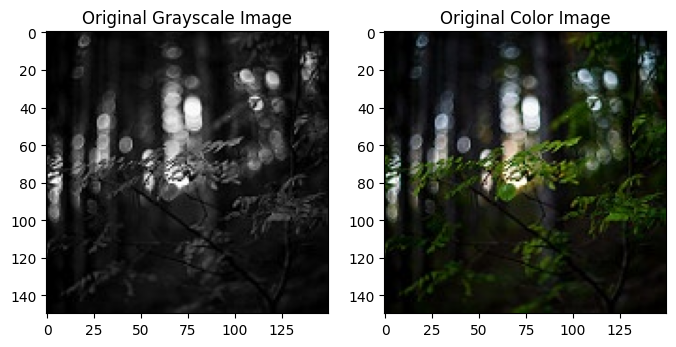

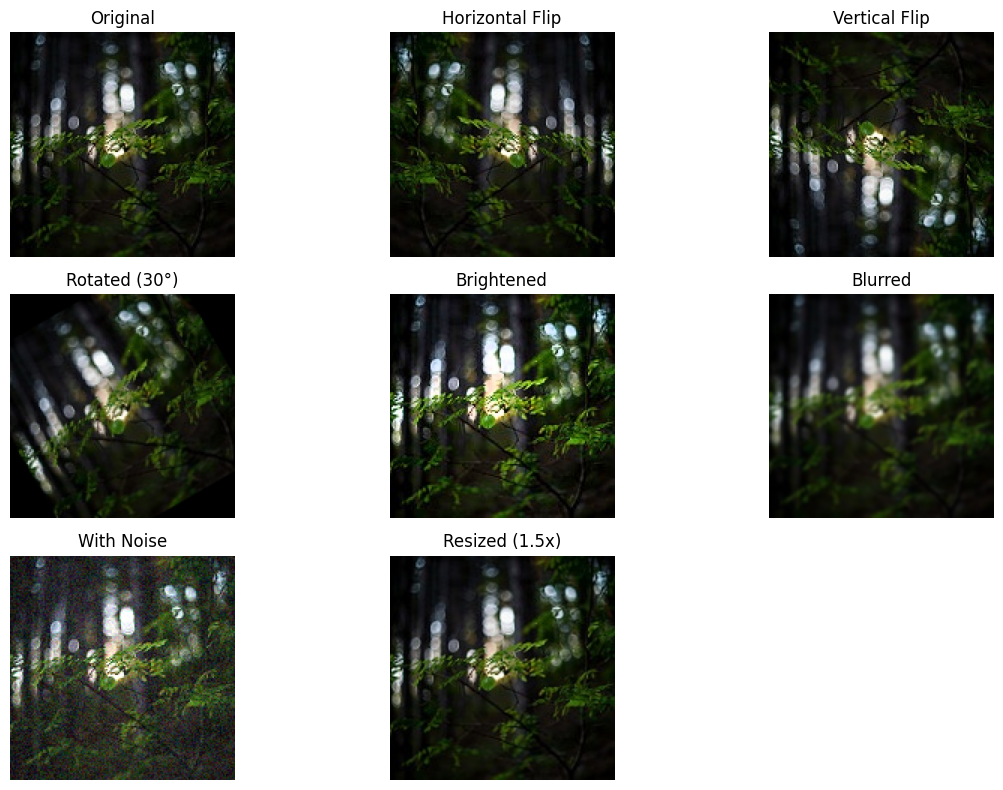

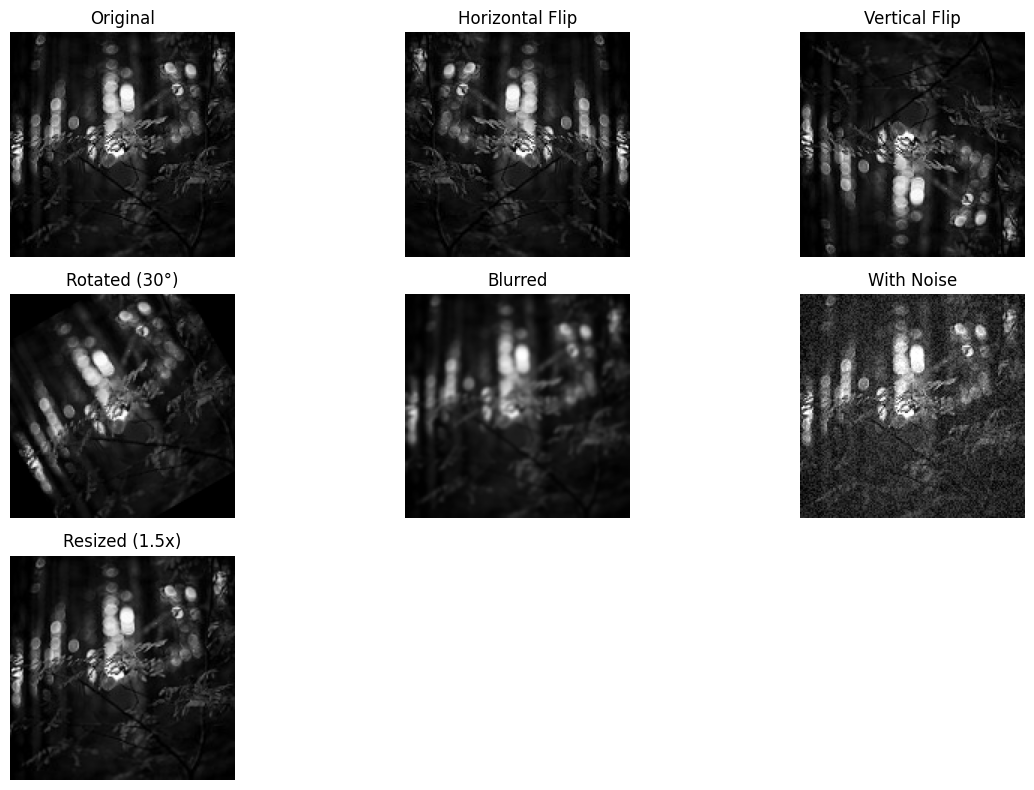

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
# Define dataset path
dataset_path = "landscape_dataset/landscape Images"
gray_folder = os.path.join(dataset_path, "gray")
color_folder = os.path.join(dataset_path, "color")

# Load a sample grayscale and color image
gray_sample_path = os.path.join(gray_folder, os.listdir(gray_folder)[0])
color_sample_path = os.path.join(color_folder, os.listdir(color_folder)[0])

# Read grayscale and color images
gray_img = cv2.imread(gray_sample_path, cv2.IMREAD_GRAYSCALE)
color_img = cv2.imread(color_sample_path)
color_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for visualization

# Display original images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original Grayscale Image")

plt.subplot(1, 2, 2)
plt.imshow(color_img)
plt.title("Original Color Image")
plt.show()

# 1. Horizontal Flip
def horizontal_flip(img):
    return cv2.flip(img, 1)

# 2. Vertical Flip
def vertical_flip(img):
    return cv2.flip(img, 0)

# 3. Rotate by an angle
def rotate_image(img, angle=30):
    h, w = img.shape[:2]
    center = (w // 2, h // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(img, rotation_matrix, (w, h))

# 4. Adjust Brightness
def adjust_brightness(img, factor=1.5):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    hsv[:, :, 2] = np.clip(hsv[:, :, 2] * factor, 0, 255)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

# 5. Apply Gaussian Blur
def apply_blur(img, kernel_size=5):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

# 6. Add Random Noise
def add_noise(img):
    noise = np.random.randint(0, 50, img.shape, dtype='uint8')
    noisy_img = cv2.add(img, noise)
    return np.clip(noisy_img, 0, 255)

# 7. Random Cropping
def random_crop(img, crop_size=50):
    h, w = img.shape[:2]
    x = random.randint(0, w - crop_size)
    y = random.randint(0, h - crop_size)
    return img[y:y + crop_size, x:x + crop_size]

# 8. Resize Image
def resize_image(img, scale=1.5):
    new_size = (int(img.shape[1] * scale), int(img.shape[0] * scale))
    return cv2.resize(img, new_size)

# Apply augmentations to the color image
aug_images = {
    "Original": color_img,
    "Horizontal Flip": horizontal_flip(color_img),
    "Vertical Flip": vertical_flip(color_img),
    "Rotated (30°)": rotate_image(color_img, 30),
    "Brightened": adjust_brightness(color_img, 1.5),
    "Blurred": apply_blur(color_img, 5),
    "With Noise": add_noise(color_img),
    "Resized (1.5x)": resize_image(color_img, 1.5),
}

# Display original vs augmented images
plt.figure(figsize=(12, 8))
for i, (title, img) in enumerate(aug_images.items()):
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Apply augmentations to the grayscale image
aug_gray_images = {
    "Original": gray_img,
    "Horizontal Flip": horizontal_flip(gray_img),
    "Vertical Flip": vertical_flip(gray_img),
    "Rotated (30°)": rotate_image(gray_img, 30),
    "Blurred": apply_blur(gray_img, 5),
    "With Noise": add_noise(gray_img),
    "Resized (1.5x)": resize_image(gray_img, 1.5),
}

# Display original vs augmented grayscale images
plt.figure(figsize=(12, 8))
for i, (title, img) in enumerate(aug_gray_images.items()):
    plt.subplot(3, 3, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()



In [ ]:
gray_folder = "landscape_dataset/landscape Images/gray"
color_folder = "landscape_dataset/landscape Images/color"


Dataset folders found!


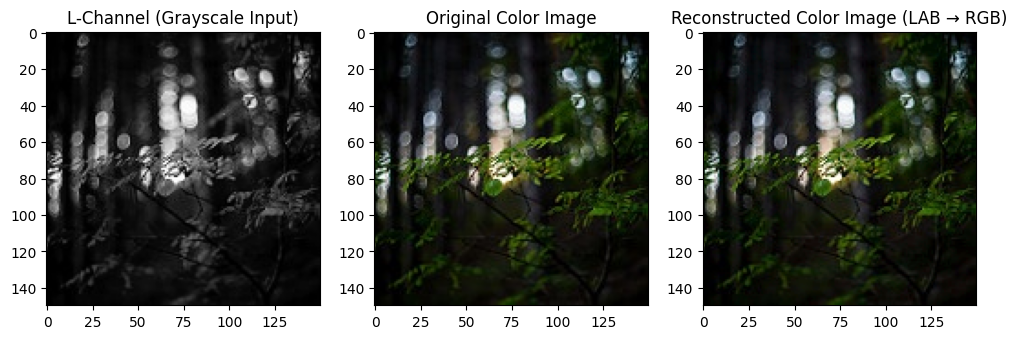

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
dataset_path = "landscape_dataset/landscape Images"
gray_folder = os.path.join(dataset_path, "gray")
color_folder = os.path.join(dataset_path, "color")
if not os.path.exists(gray_folder) or not os.path.exists(color_folder):
    print("Error: One or both dataset folders are missing. Please check the dataset path.")
else:
    print("Dataset folders found!")
gray_sample_name = os.listdir(gray_folder)[0]
color_sample_name = os.listdir(color_folder)[0]
gray_sample_path = os.path.join(gray_folder, gray_sample_name)
color_sample_path = os.path.join(color_folder, color_sample_name)
gray_img = cv2.imread(gray_sample_path, cv2.IMREAD_GRAYSCALE)
color_img = cv2.imread(color_sample_path)
if gray_img is None:
    print(f" Error: Grayscale image could not be loaded from {gray_sample_path}")
if color_img is None:
    print(f" Error: Color image could not be loaded from {color_sample_path}")
color_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)
img_lab = cv2.cvtColor(color_img, cv2.COLOR_RGB2LAB)
L, a, b = cv2.split(img_lab)
L_norm = L / 255.0
a_norm = (a - 128) / 128.0
b_norm = (b - 128) / 128.0
L_rescaled = (L_norm * 255).astype(np.uint8)
a_rescaled = ((a_norm * 128) + 128).astype(np.uint8)
b_rescaled = ((b_norm * 128) + 128).astype(np.uint8)

lab_merged = cv2.merge([L_rescaled, a_rescaled, b_rescaled])
color_reconstructed = cv2.cvtColor(lab_merged, cv2.COLOR_LAB2RGB)

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(L_norm, cmap="gray")
plt.title("L-Channel (Grayscale Input)")

plt.subplot(1, 3, 2)
plt.imshow(color_img)
plt.title("Original Color Image")

plt.subplot(1, 3, 3)
plt.imshow(color_reconstructed)
plt.title("Reconstructed Color Image (LAB → RGB)")

plt.show()


In [ ]:
# @title Form1
# import torch
# from torch.utils.data import Dataset, DataLoader
# import torchvision.transforms as transforms
# import cv2
# import numpy as np
# from PIL import Image
# import os

# # Enhanced Dataset Class with Lab Color Space Conversion & Preprocessing
# class EnhancedDataset(Dataset):
#     def __init__(self, gray_root, color_root, transform=None, augment=False):
#         self.gray_images_path = [os.path.join(gray_root, img) for img in os.listdir(gray_root)]
#         self.color_images_path = [os.path.join(color_root, img) for img in os.listdir(color_root)]
#         self.transform = transform
#         self.augment = augment

#     def __len__(self):
#         return len(self.gray_images_path)

#     def preprocess_image(self, img_path):
#         # Read Image
#         img = cv2.imread(img_path)
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

#         # Convert to Lab Color Space
#         img_lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
#         L, a, b = cv2.split(img_lab)

#         # Normalize
#         L = L / 255.0  # Scale L channel between [0,1]
#         a = (a - 128) / 128.0  # Scale a channel to [-1,1]
#         b = (b - 128) / 128.0  # Scale b channel to [-1,1]

#         return L, a, b

#     def __getitem__(self, idx):
#         # Load and Preprocess Images
#         L, a, b = self.preprocess_image(self.gray_images_path[idx])
#         color_img = cv2.imread(self.color_images_path[idx])
#         color_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)

#         # Convert to PIL for transformations
#         gray_img = Image.fromarray((L * 255).astype(np.uint8))
#         color_img = Image.fromarray(color_img)

#         # Apply transformations
#         if self.transform:
#             gray_img = self.transform(gray_img)
#             color_img = self.transform(color_img)

#         # Apply Data Augmentation (if enabled)
#         if self.augment:
#             if torch.rand(1).item() > 0.5:
#                 gray_img = transforms.functional.hflip(gray_img)
#                 color_img = transforms.functional.hflip(color_img)

#         return gray_img, color_img

# # Define Transformations
# transform = transforms.Compose([
#     transforms.Resize((128, 128)),  # Resize while maintaining aspect ratio
#     transforms.ToTensor(),
#     transforms.Normalize(mean=0.5, std=0.5)  # Normalization
# ])

# # Create Dataset
# dataset = EnhancedDataset(gray_root="./landscape_dataset/landscape Images/gray",
#                           color_root="./landscape_dataset/landscape Images/color",
#                           transform=transform, augment=True)

# # DataLoader for Training
# dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# # Display sample images after preprocessing
# import matplotlib.pyplot as plt

# gray_sample, color_sample = dataset[random.randint(1, 7128)]

# plt.figure(figsize=(8,4))
# plt.subplot(1,2,1)
# plt.imshow(gray_sample.squeeze(), cmap="gray")
# plt.title("Processed Grayscale Image")

# plt.subplot(1,2,2)
# plt.imshow(color_sample.permute(1,2,0))
# plt.title("Processed Color Image")

# plt.show()
